In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import shapely.geometry as sg
import seaborn as sns
import numpy as np

https://www.datos.cdmx.gob.mx/no/dataset/poblacion-por-rangos-de-edad/resource/ed0a7cd3-2ed7-4cc6-b318-10471a0796f6

https://www.fgjcdmx.gob.mx/transparencia/incidencia-delictiva

In [76]:
crimen = pd.read_csv('delitos.csv', skiprows=1)
crimen.replace('GUSTAVO A MADERO', 'GUSTAVO A. MADERO', inplace=True)
print(crimen.shape)
crimen.head()

(32196, 19)


,ID,ID_CI,FECHA DE INICIO,HORA DE INICIO,CT - INICIO AP,TIPO IMPACTO,DELITO,MODALIDAD - DELITO,FECHA DE LOS HECHOS,HORA DE LOS HECHOS,CALLE 1 HECHOS,CALLE 2 HECHOS,COLONIA HECHOS,ALCALDÍA HECHOS,CT HECHOS,COORD X,COORD Y,OBSERVACIÓN,Unnamed: 18
0,1,8601246,01/01/2020,11:05,H1,ALTO IMPACTO,HOMICIDIO DOLOSO,HOMICIDIO POR ARMA BLANCA,01/01/2020,09:55,F.C. NACIONALES DE MEXICO,AND. NUEVA GALICIA,NUEVA ESPAÑA,AZCAPOTZALCO,AZ-1,-99.18972843,19.49874581,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
1,2,8601195,01/01/2020,05:59,2,ALTO IMPACTO,HOMICIDIO DOLOSO,HOMICIDIO POR ARMA DE FUEGO,01/01/2020,04:50,15 Y AVENIDA GUADALUPE,SIN REGISTRO,GUADALUPE PROLETARIA,GUSTAVO A. MADERO,GAM-2,-99.15697157,19.52171133,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
2,3,8601218,01/01/2020,08:43,2,ALTO IMPACTO,HOMICIDIO DOLOSO,HOMICIDIO POR ARMA DE FUEGO,01/01/2020,07:30,PIRULES,SIN REGISTRO,TLALPEXCO,GUSTAVO A. MADERO,GAM-1,-99.12876972,19.54421028,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
3,4,8601245,01/01/2020,11:04,IZP-9,ALTO IMPACTO,HOMICIDIO DOLOSO,HOMICIDIO POR ARMA DE FUEGO,01/01/2020,11:00,elisa,SIN REGISTRO,2A. AMPLIACIÓN SANTIAGO ACAHUALTEPEC,IZTAPALAPA,IZP-10,-99.01514062,19.34773094,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
4,5,8601242,01/01/2020,10:53,H3,ALTO IMPACTO,HOMICIDIO DOLOSO,HOMICIDIO POR GOLPES,30/12/2019,06:30,DALIA,JOSEFA ORTIZ DE DOMINGUEZ,BARRIO SAN ESTEBAN,XOCHIMILCO,XO-2,-99.09859972,19.26437498,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN


In [77]:
print(crimen.columns)
crimen['DELITO'].value_counts()

Index(['ID', 'ID_CI', 'FECHA DE INICIO', 'HORA DE INICIO', 'CT - INICIO AP',
       'TIPO IMPACTO', 'DELITO', 'MODALIDAD - DELITO', 'FECHA DE LOS HECHOS',
       'HORA DE LOS HECHOS', 'CALLE 1 HECHOS', 'CALLE 2 HECHOS',
       'COLONIA HECHOS', 'ALCALDÍA HECHOS', 'CT HECHOS', 'COORD X', 'COORD Y',
       'OBSERVACIÓN', 'Unnamed: 18'],
      dtype='object')


DELITO
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA       10189
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                       10018
ROBO A NEGOCIO CON VIOLENCIA                                3514
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                       2349
VIOLACIÓN                                                   1505
HOMICIDIO DOLOSO                                            1206
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                871
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        782
ROBO A CASA HABITACIÓN CON VIOLENCIA                         633
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA      504
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA      361
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                156
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                      78
SECUESTRO                                                     30
Name: count, dtype: int64

In [78]:
crimen = crimen[crimen['DELITO'] == 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA']
print(crimen.shape)
crimen.head()

(10189, 19)


,ID,ID_CI,FECHA DE INICIO,HORA DE INICIO,CT - INICIO AP,TIPO IMPACTO,DELITO,MODALIDAD - DELITO,FECHA DE LOS HECHOS,HORA DE LOS HECHOS,CALLE 1 HECHOS,CALLE 2 HECHOS,COLONIA HECHOS,ALCALDÍA HECHOS,CT HECHOS,COORD X,COORD Y,OBSERVACIÓN,Unnamed: 18
15,16,8601220,01/01/2020,09:28,AZ-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,08:49,AV. EL ROSARIO,CULTURA NORTE,EL ROSARIO,AZCAPOTZALCO,AZ-1,-99.20273257,19.50148613,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
16,17,8601417,01/01/2020,20:57,BJ-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,19:45,CERRADA DE MIGUEL NEGRETE,BOLIVAR,NIÑOS HÉROES,BENITO JUAREZ,BJ-3,-99.14583393,19.38568257,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
17,18,8601175,01/01/2020,01:33,CUH-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,00:50,AV. PASEO DE LA REFORMA,SIN REGISTRO,CUAUHTÉMOC,CUAUHTEMOC,CUH-5,-99.16452756,19.42931902,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
18,19,8601353,01/01/2020,16:44,CUH-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,15:30,LUIS MOYA,PUGIBET,CENTRO,CUAUHTEMOC,CUH-6,-99.14571496,19.42973786,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
19,20,8601367,01/01/2020,17:52,CUH-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,17:20,MANUEL DE LAPEÑA Y PEÑA,GONZALEZ ORTEGA,CENTRO,CUAUHTEMOC,CUH-4,-99.12597352,19.44014235,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN


In [79]:
robos_alcadia = crimen.groupby('ALCALDÍA HECHOS')['DELITO'].count()
print(robos_alcadia)

ALCALDÍA HECHOS
ALVARO OBREGON             858
AZCAPOTZALCO               507
BENITO JUAREZ              586
COYOACAN                   561
CUAJIMALPA DE MORELOS       70
CUAUHTEMOC                1386
GUSTAVO A. MADERO          983
IZTACALCO                  458
IZTAPALAPA                1898
LA MAGDALENA CONTRERAS     123
MIGUEL HIDALGO             934
MILPA ALTA                  54
SIN REGISTRO                 2
TLAHUAC                    337
TLALPAN                    329
VENUSTIANO CARRANZA        808
XOCHIMILCO                 295
Name: DELITO, dtype: int64


# Poblacion

In [80]:
poblacion = pd.read_csv('poblacion.csv')
poblacion.head(50)

,alcaldia,localidad,sexo,rango_edad,poblacion
0,AZCAPOTZALCO,Azcapotzalco,Hombre,a) 0 a 4 años,10794
1,AZCAPOTZALCO,Azcapotzalco,Hombre,b) 5 a 9 años,11950
2,AZCAPOTZALCO,Azcapotzalco,Hombre,c) 10 a 14 años,13219
3,AZCAPOTZALCO,Azcapotzalco,Hombre,d) 15 a 19 años,14272
4,AZCAPOTZALCO,Azcapotzalco,Hombre,e) 20 a 24 años,15895
5,AZCAPOTZALCO,Azcapotzalco,Hombre,f) 25 a 29 años,16899
6,AZCAPOTZALCO,Azcapotzalco,Hombre,g) 30 a 34 años,17047
7,AZCAPOTZALCO,Azcapotzalco,Hombre,h) 35 a 39 años,15868
8,AZCAPOTZALCO,Azcapotzalco,Hombre,i) 40 a 44 años,14624
9,AZCAPOTZALCO,Azcapotzalco,Hombre,j) 45 a 49 años,14810


In [81]:
poblacion_alcaldia = poblacion.groupby('alcaldia')['poblacion'].sum()
print(poblacion_alcaldia)

alcaldia
ALVARO OBREGON             758180
AZCAPOTZALCO               431840
BENITO JUAREZ              434115
COYOACAN                   614319
CUAJIMALPA DE MORELOS      216398
CUAUHTEMOC                 545818
GUSTAVO A. MADERO         1173117
IZTACALCO                  404517
IZTAPALAPA                1835091
LA MAGDALENA CONTRERAS     246385
MIGUEL HIDALGO             408544
MILPA ALTA                 135926
TLAHUAC                    388687
TLALPAN                    692545
VENUSTIANO CARRANZA        443289
XOCHIMILCO                 434406
Name: poblacion, dtype: int64


In [82]:
robos_poblacion_df = pd.DataFrame({
    'robos': robos_alcadia,
    'poblacion': poblacion_alcaldia
}).dropna()

robos_poblacion_df['radio_robos'] = (robos_poblacion_df['robos'] / robos_poblacion_df['poblacion']) * 100000

robos_poblacion_df

,robos,poblacion,radio_robos
ALVARO OBREGON,858,758180.0,113.165739
AZCAPOTZALCO,507,431840.0,117.404594
BENITO JUAREZ,586,434115.0,134.987273
COYOACAN,561,614319.0,91.320633
CUAJIMALPA DE MORELOS,70,216398.0,32.347804
CUAUHTEMOC,1386,545818.0,253.930797
GUSTAVO A. MADERO,983,1173117.0,83.793859
IZTACALCO,458,404517.0,113.221447
IZTAPALAPA,1898,1835091.0,103.428113
LA MAGDALENA CONTRERAS,123,246385.0,49.921870


Se seleccionara CUAHTEMOC, GUSTRAVO A. MADERO Y CUAJIMALPA DE MORELOS

# Limpieza

In [83]:
alcaldias_interes = ['CUAUHTEMOC', 'GUSTAVO A. MADERO', 'CUAJIMALPA DE MORELOS']

### Crimen

In [84]:
crimen = crimen[crimen['ALCALDÍA HECHOS'].isin(alcaldias_interes)]
crimen['COORD X'] = pd.to_numeric(crimen['COORD X'], errors='coerce')
crimen['COORD Y'] = pd.to_numeric(crimen['COORD Y'], errors='coerce')

crimen = crimen.dropna(subset=['COORD X', 'COORD Y'])
robos_alcadia = crimen.groupby('ALCALDÍA HECHOS')['DELITO'].count()
print(robos_alcadia)

ALCALDÍA HECHOS
CUAJIMALPA DE MORELOS      69
CUAUHTEMOC               1380
GUSTAVO A. MADERO         978
Name: DELITO, dtype: int64


In [85]:
print(crimen.columns)
crimen.head()

Index(['ID', 'ID_CI', 'FECHA DE INICIO', 'HORA DE INICIO', 'CT - INICIO AP',
       'TIPO IMPACTO', 'DELITO', 'MODALIDAD - DELITO', 'FECHA DE LOS HECHOS',
       'HORA DE LOS HECHOS', 'CALLE 1 HECHOS', 'CALLE 2 HECHOS',
       'COLONIA HECHOS', 'ALCALDÍA HECHOS', 'CT HECHOS', 'COORD X', 'COORD Y',
       'OBSERVACIÓN', 'Unnamed: 18'],
      dtype='object')


,ID,ID_CI,FECHA DE INICIO,HORA DE INICIO,CT - INICIO AP,TIPO IMPACTO,DELITO,MODALIDAD - DELITO,FECHA DE LOS HECHOS,HORA DE LOS HECHOS,CALLE 1 HECHOS,CALLE 2 HECHOS,COLONIA HECHOS,ALCALDÍA HECHOS,CT HECHOS,COORD X,COORD Y,OBSERVACIÓN,Unnamed: 18
17,18,8601175,01/01/2020,01:33,CUH-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,00:50,AV. PASEO DE LA REFORMA,SIN REGISTRO,CUAUHTÉMOC,CUAUHTEMOC,CUH-5,-99.164528,19.429319,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
18,19,8601353,01/01/2020,16:44,CUH-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,15:30,LUIS MOYA,PUGIBET,CENTRO,CUAUHTEMOC,CUH-6,-99.145715,19.429738,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
19,20,8601367,01/01/2020,17:52,CUH-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,01/01/2020,17:20,MANUEL DE LAPEÑA Y PEÑA,GONZALEZ ORTEGA,CENTRO,CUAUHTEMOC,CUH-4,-99.125974,19.440142,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
20,21,8601169,01/01/2020,00:30,CUH-6,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,19/10/2019,14:40,REPUBLICA DE COLOMBIA,CARMEN,CENTRO,CUAUHTEMOC,CUH-4,-99.129393,19.438092,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN
30,31,8601265,01/01/2020,11:54,TUR-2,ALTO IMPACTO,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA,31/12/2019,23:25,COPENHAGUE,PASEO DE LA REFORMA,JUÁREZ,CUAUHTEMOC,CUH-5,-99.164472,19.428443,LAS COORDENADAS QUE SE MUESTRAN NO CORRESPONDE...,NaN


### Poblacion

In [86]:
poblacion = poblacion[poblacion['alcaldia'].isin(alcaldias_interes)]
poblacion_alcaldia = poblacion.groupby('alcaldia')['poblacion'].sum()
print(poblacion_alcaldia)

alcaldia
CUAJIMALPA DE MORELOS     216398
CUAUHTEMOC                545818
GUSTAVO A. MADERO        1173117
Name: poblacion, dtype: int64


In [87]:
print(poblacion.columns)
poblacion.head()

Index(['alcaldia', 'localidad', 'sexo', 'rango_edad', 'poblacion'], dtype='object')


,alcaldia,localidad,sexo,rango_edad,poblacion
72,CUAJIMALPA DE MORELOS,Cuajimalpa de Morelos,Hombre,a) 0 a 4 años,6079
73,CUAJIMALPA DE MORELOS,Cuajimalpa de Morelos,Hombre,b) 5 a 9 años,6559
74,CUAJIMALPA DE MORELOS,Cuajimalpa de Morelos,Hombre,c) 10 a 14 años,6708
75,CUAJIMALPA DE MORELOS,Cuajimalpa de Morelos,Hombre,d) 15 a 19 años,7108
76,CUAJIMALPA DE MORELOS,Cuajimalpa de Morelos,Hombre,e) 20 a 24 años,7472


# Analisis

## Var dependiente (crimen)

In [88]:
ruta_geojson = 'mapa.json'

agebs = gpd.read_file(ruta_geojson)
# agebs = agebs[agebs['NOMGEO'].isin(['Cuauhtémoc', 'Gustavo A. Madero', 'Cuajimalpa de Morelos'])]
agebs.head(20)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NOM_ENT,COV_,COV_ID,AREA,PERIMETER,geometry
0,09003,09,003,Coyoacán,Ciudad de México,275,276,5362.231427,33293.881387,"POLYGON ((-99.13984 19.35692, -99.13923 19.356..."
1,09007,09,007,Iztapalapa,Ciudad de México,276,277,11252.806399,55993.681263,"POLYGON ((-99.05813 19.40072, -99.05814 19.400..."
2,09008,09,008,La Magdalena Contreras,Ciudad de México,277,278,6307.476712,47546.085775,"POLYGON ((-99.21993 19.31226, -99.22047 19.311..."
3,09009,09,009,Milpa Alta,Ciudad de México,278,279,29672.886592,76023.989271,"POLYGON ((-98.96853 19.21057, -98.96838 19.210..."
4,09010,09,010,Álvaro Obregón,Ciudad de México,279,280,9535.832693,78321.140148,"POLYGON ((-99.18906 19.39559, -99.18871 19.394..."
5,09011,09,011,Tláhuac,Ciudad de México,280,281,8538.328298,55680.003825,"POLYGON ((-98.96045 19.32537, -98.96036 19.325..."
6,09012,09,012,Tlalpan,Ciudad de México,281,282,31285.267302,100582.296823,"POLYGON ((-99.19811 19.30300, -99.19776 19.302..."
7,09013,09,013,Xochimilco,Ciudad de México,282,283,11350.430151,60393.366898,"POLYGON ((-99.09908 19.32044, -99.09906 19.320..."
8,09006,09,006,Iztacalco,Ciudad de México,283,284,2296.278473,27292.399827,"POLYGON ((-99.05579 19.42214, -99.05584 19.421..."
9,09015,09,015,CUAUHTEMOC,Ciudad de México,284,285,3233.524482,24394.760015,"POLYGON ((-99.12224 19.45978, -99.12224 19.459..."


In [89]:
crimen['geometry'] = crimen.apply(lambda row: sg.Point(row['COORD X'], row['COORD Y']), axis=1)
crimen_gdf = gpd.GeoDataFrame(crimen, geometry='geometry')

crimen_gdf.set_crs(agebs.crs, inplace=True)
print("CRS del mapa base:", agebs.crs)
print("CRS de crímenes:", crimen_gdf.crs)


CRS del mapa base: EPSG:4326
CRS de crímenes: EPSG:4326


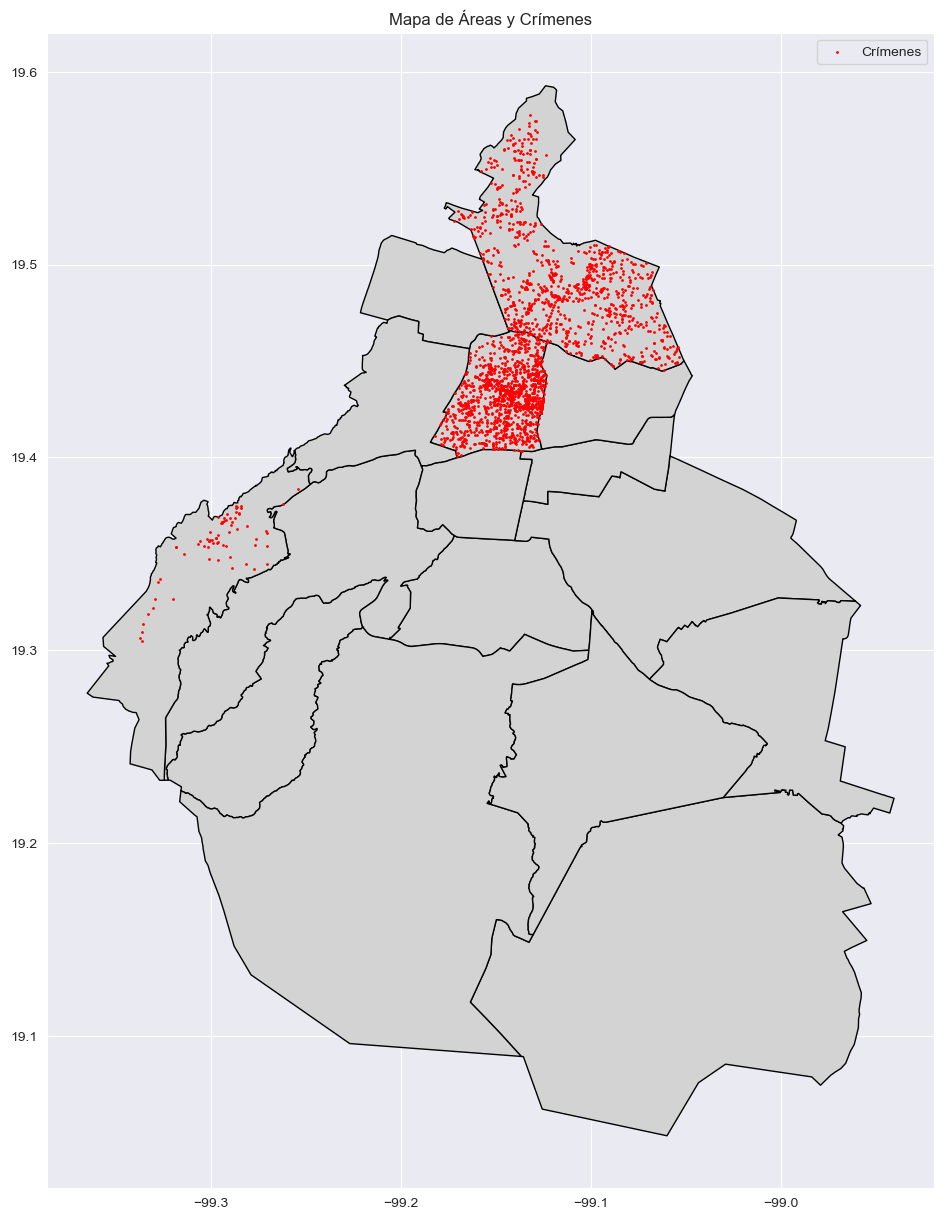

In [90]:
fig, ax = plt.subplots(figsize=(15, 15))  # Aumentar el tamaño de la figura

agebs.plot(ax=ax, color='lightgrey', edgecolor='black')

crimen_gdf.plot(ax=ax, markersize=1, color='red', alpha=1, marker='o', label='Crímenes')

xmin, ymin, xmax, ymax = agebs.total_bounds
margin_x = (xmax - xmin) * 0.05
margin_y = (ymax - ymin) * 0.05
ax.set_xlim(xmin - margin_x, xmax + margin_x)
ax.set_ylim(ymin - margin_y, ymax + margin_y)

plt.legend()
plt.title('Mapa de Áreas y Crímenes')

plt.show()

In [96]:
agebs = agebs[agebs['NOMGEO'].isin(alcaldias_interes)]
agebs

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NOM_ENT,COV_,COV_ID,AREA,PERIMETER,geometry,area_km2
9,09015,09,015,CUAUHTEMOC,Ciudad de México,284,285,3233.524482,24394.760015,"POLYGON ((-99.12224 19.45978, -99.12224 19.459...",32.335245
13,09005,09,005,GUSTAVO A. MADERO,Ciudad de México,288,289,8737.830624,56403.558051,"POLYGON ((-99.11789 19.59059, -99.11860 19.584...",87.378306
14,09004,09,004,CUAJIMALPA DE MORELOS,Ciudad de México,289,290,7076.185866,66252.498897,"POLYGON ((-99.25581 19.40357, -99.25567 19.403...",70.761859


# Varaibles independientes
## Densidad de poblacion

In [97]:
agebs['area_km2'] = agebs['AREA'] / 100
agebs

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,NOM_ENT,COV_,COV_ID,AREA,PERIMETER,geometry,area_km2
9,09015,09,015,CUAUHTEMOC,Ciudad de México,284,285,3233.524482,24394.760015,"POLYGON ((-99.12224 19.45978, -99.12224 19.459...",32.335245
13,09005,09,005,GUSTAVO A. MADERO,Ciudad de México,288,289,8737.830624,56403.558051,"POLYGON ((-99.11789 19.59059, -99.11860 19.584...",87.378306
14,09004,09,004,CUAJIMALPA DE MORELOS,Ciudad de México,289,290,7076.185866,66252.498897,"POLYGON ((-99.25581 19.40357, -99.25567 19.403...",70.761859


In [93]:
area_alcaldia = pd.DataFrame(agebs)
area_alcaldia = area_alcaldia[['NOMGEO', 'AREA', 'area_km2']]

In [94]:
print(area_alcaldia.columns)
area_alcaldia.head()

Index(['NOMGEO', 'AREA', 'area_km2'], dtype='object')


,NOMGEO,AREA,area_km2
9,CUAUHTEMOC,3233.524482,32.335245
13,GUSTAVO A. MADERO,8737.830624,87.378306
14,CUAJIMALPA DE MORELOS,7076.185866,70.761859


In [95]:
poblacion_alcaldia = pd.DataFrame(poblacion_alcaldia)
print(poblacion_alcaldia.columns)
poblacion_alcaldia.head()

Index(['poblacion'], dtype='object')


,poblacion
alcaldia,
CUAJIMALPA DE MORELOS,216398
CUAUHTEMOC,545818
GUSTAVO A. MADERO,1173117


In [100]:
densidad_df = area_alcaldia.merge(poblacion_alcaldia, left_on='NOMGEO', right_index=True)
densidad_df['densidad_poblacion'] = densidad_df['poblacion'] / densidad_df['area_km2']
densidad_df.head()

,NOMGEO,AREA,area_km2,poblacion,densidad_poblacion
9,CUAUHTEMOC,3233.524482,32.335245,545818,16879.971159
13,GUSTAVO A. MADERO,8737.830624,87.378306,1173117,13425.723734
14,CUAJIMALPA DE MORELOS,7076.185866,70.761859,216398,3058.116394
